In [91]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('Insane.png')
img = img[25:,:,:]

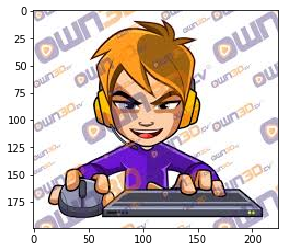

In [92]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [93]:
img.shape

(199, 224, 3)

In [94]:
X = img.reshape((-1,3))
print(X.shape)

(44576, 3)


In [95]:
from sklearn.cluster import KMeans

In [96]:
km = KMeans(n_clusters = 3)

In [97]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [98]:
centers = km.cluster_centers_

In [99]:
print(centers)

[[250.94270375 248.72235849 247.95890221]
 [ 96.4388429   57.90754348  75.27867175]
 [204.4987723  171.57087903 150.97610083]]


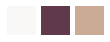

In [100]:
import numpy as np
colors = []
for i,color in enumerate(centers):
    plt.subplot(1,10,i+1)
    colors.append(color)
    
    square = np.zeros((100,100,3),dtype='uint8')
    square[:,:,:] = color
    plt.imshow(square)
    plt.axis("off")
plt.show()

In [101]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2]), array([21617, 10743, 12216]))

In [102]:
labels = km.labels_

In [103]:
new_img = np.zeros(X.shape)
for ix in range(X.shape[0]):
    new_img[ix] = colors[labels[ix]]
print(new_img.shape)

(44576, 3)


In [104]:
new_img = new_img.reshape(img.shape)

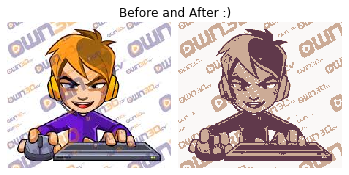

In [105]:
new_img = new_img/255
plt.imshow(np.hstack((img/255,np.ones((199,10,3)),new_img)))
plt.axis("off")
plt.title("Before and After :)")
plt.show()